<a href="https://colab.research.google.com/github/OVP2023/ML/blob/main/%D0%BA%D0%BB%D0%B0%D1%81%D1%82%D0%B5%D1%80%D0%B8%D0%B7%D0%B0%D1%86%D0%B8%D1%8F_%D0%B4%D0%B7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

В домашнем задании нужно сократить число цветов в палитре изображения. Картинку для выполнения работы можно выбрать любую, главное условие – наличие на ней разных цветов, для того, чтобы результат работы моделей был заметен.
Для выполнения работы необходимо выделить кластеры в пространстве RGB, объекты соответствуют пикселям изображения. После выделения кластеров все пиксели, отнесенные в один кластер, заполняются одним цветом. Цвет – центроид соответствующего кластера.
Этапы работы:

    Получите данные и загрузите их в рабочую среду (Jupyter Notebook или другую).
    a) Для отображения картинки воспользуйтесь вспомогательной функцией:
    import matplotlib.pyplot as plt
    import cv2
    import skimage
    def draw_picture(image, title, bgr=False):
    b, g, r = cv2.split(image) # по умолчанию cv2 почему-то отдает цвета в порядке BGR вместо RGB
    new_image = cv2.merge([r, g, b])
    plt.figure(figsize=(7, 5))
    plt.axis(‘off’)
    plt.imshow(new_image)
    plt.title(title)
    plt.show()
    b) Для загрузки картинки можно использовать код:
    img = cv.imread(path)
    Реализуйте три модели кластеризации:
    a) KMeans. Рассмотрите число кластеров K = 2, 5, 10, 20.
    b) DBSCAN
    c) AgglomerativeClustering. Рассмотрите число кластеров K = 2, 5, 10, 20.
    Для каждой модели оцените потери от уменьшения цветов при помощи метрики SSIM.
    Сформулируйте выводы по проделанной работе.
    a) Какая модель показала лучший результат?
    Для получения зачета по этому домашнему заданию минимально должно быть реализовано обучение трех моделей с одним и тем же значением кластеров, где такой параметр присутствует.

In [1]:
import numpy as np

from matplotlib import pyplot as plt
import seaborn as sns

from matplotlib import rcParams
rcParams['figure.figsize'] = (8, 6)

import warnings
warnings.filterwarnings('ignore')

In [9]:
#Скачиваем изображение в
import cv2

img = cv2.imread('/content/drive/MyDrive/Datasets/Изображение_к_дз_по_Кластеризации_feml.jpg')

In [10]:
#Функция для отображения изображения из дз
import skimage

def draw_picture(image, title, bgr=False):
    b, g, r = cv2.split(image) # по умолчанию cv2 почему-то отдает цвета в порядке BGR вместо RGB
    new_image = cv2.merge([r, g, b])
    plt.figure(figsize=(7, 5))
    plt.axis('off')
    plt.imshow(new_image)
    plt.title(title)
    plt.show()

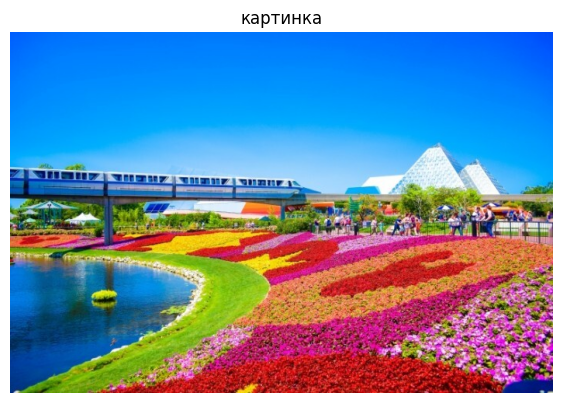

In [11]:
draw_picture(img,'картинка',bgr=False)

array([[[253,  93,   0],
        [255,  96,   0],
        [254,  97,   0],
        ...,
        [248,  76,   0],
        [247,  75,   0],
        [246,  73,   0]],

       [[255,  96,   0],
        [254,  97,   0],
        [255, 100,   1],
        ...,
        [250,  79,   1],
        [249,  77,   1],
        [248,  76,   0]],

       [[253,  97,   0],
        [255, 100,   1],
        [255, 101,   0],
        ...,
        [250,  79,   0],
        [250,  79,   1],
        [249,  78,   0]],

       ...,

       [[129,  52,   1],
        [132,  52,   0],
        [129,  57,   1],
        ...,
        [129,  28,   0],
        [113,  22,   1],
        [131,  17,   1]],

       [[127,  52,   0],
        [120,  49,  11],
        [122,  50,   2],
        ...,
        [122,  19,  10],
        [129,  24,   0],
        [115,  21,   2]],

       [[126,  47,   4],
        [218, 217, 203],
        [ 74, 142,  94],
        ...,
        [213, 193, 160],
        [108,  30,   6],
        [135, 127, 119]]], dtype=uint8)
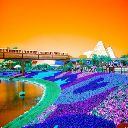

In [14]:
img = cv2.resize(img, (128, 128)) #уменьшаем размер массива до 128х128
img